# 모델 평가와 성능향상

### 모델 평가와 매개변수 선택
1. 지도 학습 모델을 평가 : train_test_split 함수
    - 데이터셋을 훈련세트와 테스트 세트로 나눔
2. 모델을 만들기 위해 훈련세트에 fit 메서드 적용
3. 모델 평가를 위해 테스트 세트에 score 메서드 사용
4. 분류에서 score메서드는 정확히 분류된 샘플의 비율을 계산

In [2]:
# 폰트
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

# 경고무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1]:
# preamble
import sklearn
from preamble import *
import matplotlib

In [5]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print(f'테스트 세트 점수 {logreg.score(X_test, y_test) : .2f}')

테스트 세트 점수  0.88


# 1. 겹 교차 검증
1. 단순한 k-겹 교차 검증
2. 계층별 k-겹 교차 검증

[참고블로그](https://nonmeyet.tistory.com/entry/KFold-Cross-Validation%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D-%EC%A0%95%EC%9D%98-%EB%B0%8F-%EC%84%A4%EB%AA%85)

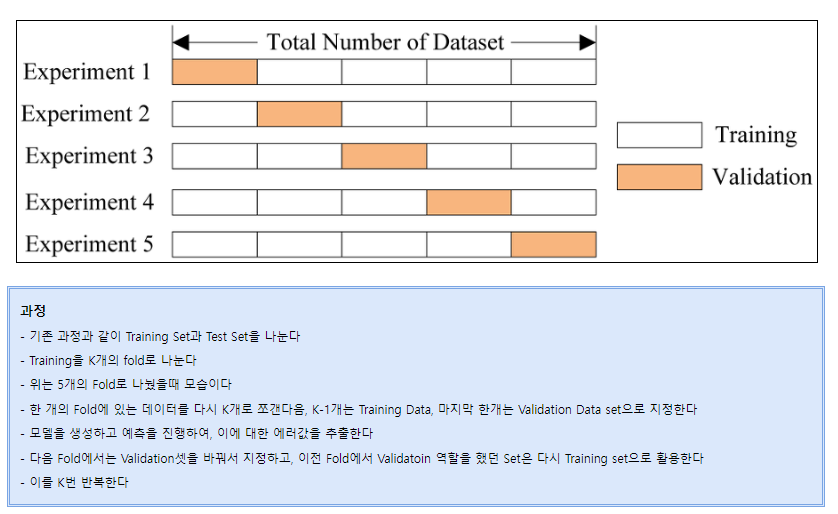

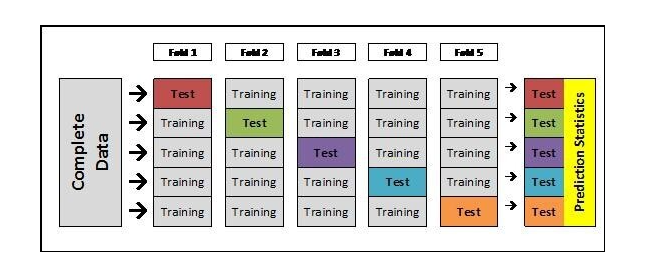

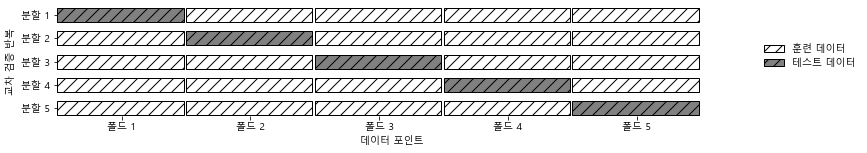

In [6]:
mglearn.plots.plot_cross_validation()

# 1-1.scikit-learn의 교차검증
- max_iter: Gradient Descent 방식으로 최적의 해를 구하는 하이퍼 파라미터로 일정 수준이상이 되면 수렴되어 더이상 오르지 않는다

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg =LogisticRegression(max_iter=100) # 계산에 사용할 작업 수

scores = cross_val_score(logreg, iris.data, iris.target)
print(f"교차 검증 점수: {scores}")

scores = cross_val_score(logreg , iris.data, iris.target, cv=10) 
print(f'10겹 만들어서 교차검증 {scores}')

print(f'10겹 교차 검증 평균 {scores.mean()}')

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]
10겹 만들어서 교차검증 [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]
10겹 교차 검증 평균 0.9733333333333334


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)

scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]
교차 검증 점수: [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]


In [16]:
# 시간이 나오는 cross_validate라는게 있다
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target,
                     return_train_score=True)
res

{'fit_time': array([0.014, 0.019, 0.014, 0.014, 0.014]),
 'score_time': array([0.   , 0.   , 0.001, 0.   , 0.   ]),
 'test_score': array([0.967, 1.   , 0.933, 0.967, 1.   ]),
 'train_score': array([0.967, 0.967, 0.983, 0.983, 0.975])}

In [17]:
res_df = pd.DataFrame(res)
display(res_df)
print(f"평균 시간과 점수: \n {res_df.mean()}")

,fit_time,score_time,test_score,train_score
0,0.01,0.00e+00,0.97,0.97
1,0.02,0.00e+00,1.00,0.97
2,0.01,9.98e-04,0.93,0.98
3,0.01,0.00e+00,0.97,0.98
4,0.01,0.00e+00,1.00,0.97


평균 시간과 점수: 
 fit_time       1.49e-02
score_time     2.00e-04
test_score     9.73e-01
train_score    9.75e-01
dtype: float64


# 1-2.교차 검증의 장점
- 총 데이터 갯수가 적은 데이터 셋에 대하여 정확도를 향상 시킬 수 있다.
- Training / Validation / Test 세 개의 집단으로 분류하는 것보다 train, test로만 분류할 때 학습 데이터 셋이 더 많이 때문에
    - 데이터 수가 적은데 검증과 테스트에 데이터를 뺏기면 언더핏팅 등 성능이 미달되는 모델이 학습될 수 있다.

# 1-3. 계층별 k-겹 교차 검증
#### 단순한 k-겹 검증에는 문제가 있으니, scikit-learn은 분류일 경우 이 방법 대신 계층별 k-겹 교차 검증을 사용한다.

- n_splits : 분할할 세트의 개수, 1세트만 test 데이터로 사용하고 나머지는 train 데이터로 사용
- shuffle : True로 설정 시 데이터셋 내의 순서를 섞어서 샘플링, False인 경우 순서대로 분할

- random_state : seed 설정, 특정 정수로 지정 시 샘플링 결과 고정


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n", iris.target)

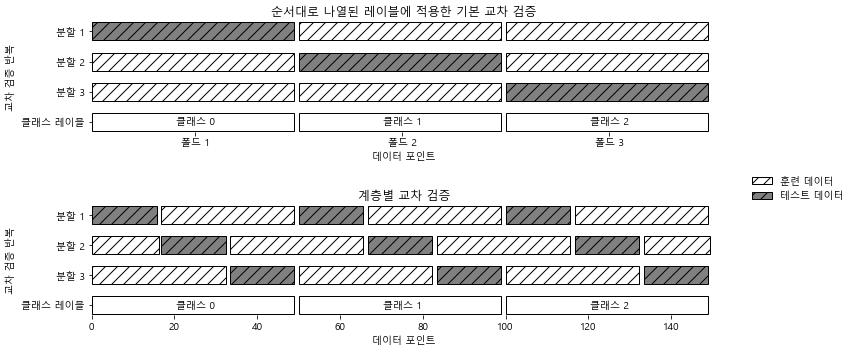

In [18]:
mglearn.plots.plot_stratified_cross_validation()

In [21]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print(f'교차 검증 점수: \n {cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

kfold = KFold(n_splits=3) 
print(f'교차 검증 점수: \n {cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

교차 검증 점수: 
 [1.    1.    0.867 0.933 0.833]
교차 검증 점수: 
 [0. 0. 0.]


- n_splits=3일 때 각 폴드는 iris 데이터셋의 클래스 중 하나에 대응하므로 아무것도 학습할 수 없다.
- 데이터를 섞어서 샘플의 순서를 랜덤하게 만든다 (KFold의 shuffle 매개변수를 True)

In [22]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0) 
print(f'교차 검증 점수: \n {cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

교차 검증 점수: 
 [0.98 0.96 0.96]


# 1-4. 

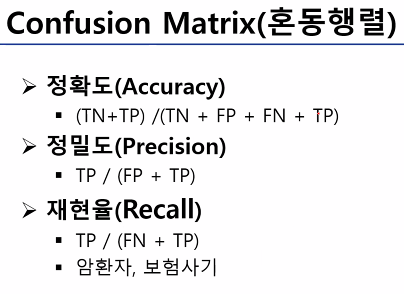

# 2.평가 지표와 측정

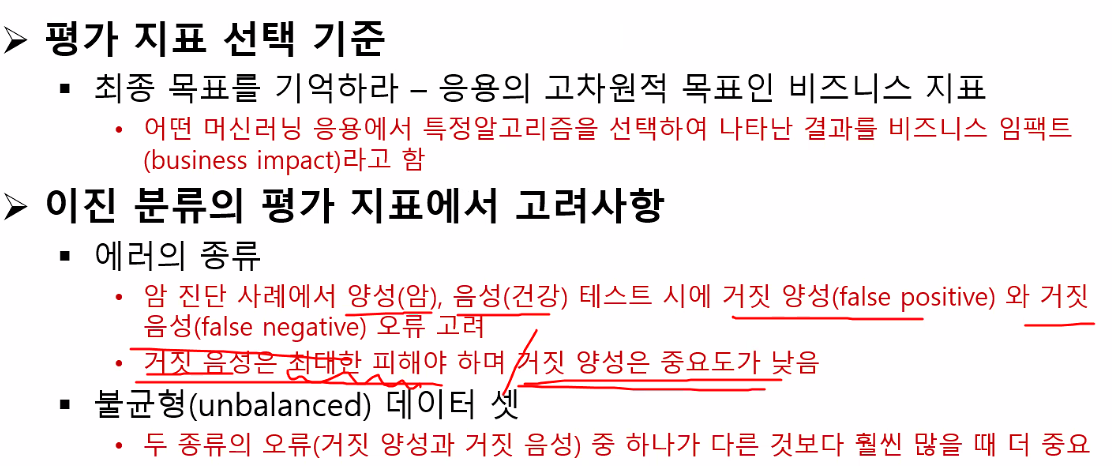

In [2]:
# 폰트
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

# 경고무시
import warnings
warnings.filterwarnings("ignore")

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data
                                                   ,y
                                                   ,random_state=0)


In [8]:
# 항상 다수인 클래스(여기서는 '9'가 아님)를 예측값으로 내놓은 dummyclassifier를 사용해서 정확도를 계산
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train) # 가장많이 출현하는거
pred_most_frequent = dummy_majority.predict(X_test)
print(f'예측된 레이블의 고유값: {np.unique(pred_most_frequent)}')
print(f"테스트 점수 {dummy_majority.score(X_test,y_test):.2f}")

예측된 레이블의 고유값: [False]
테스트 점수 0.90


In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f"테스트 점수 {tree.score(X_test,y_test):.2f}")

테스트 점수 0.92


In [20]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print(f'dummy점수: {dummy.score(X_test,y_test)}')

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f'logreg 점수 { logreg.score(X_test,y_test)}')

dummy점수: 0.8
logreg 점수 0.9844444444444445


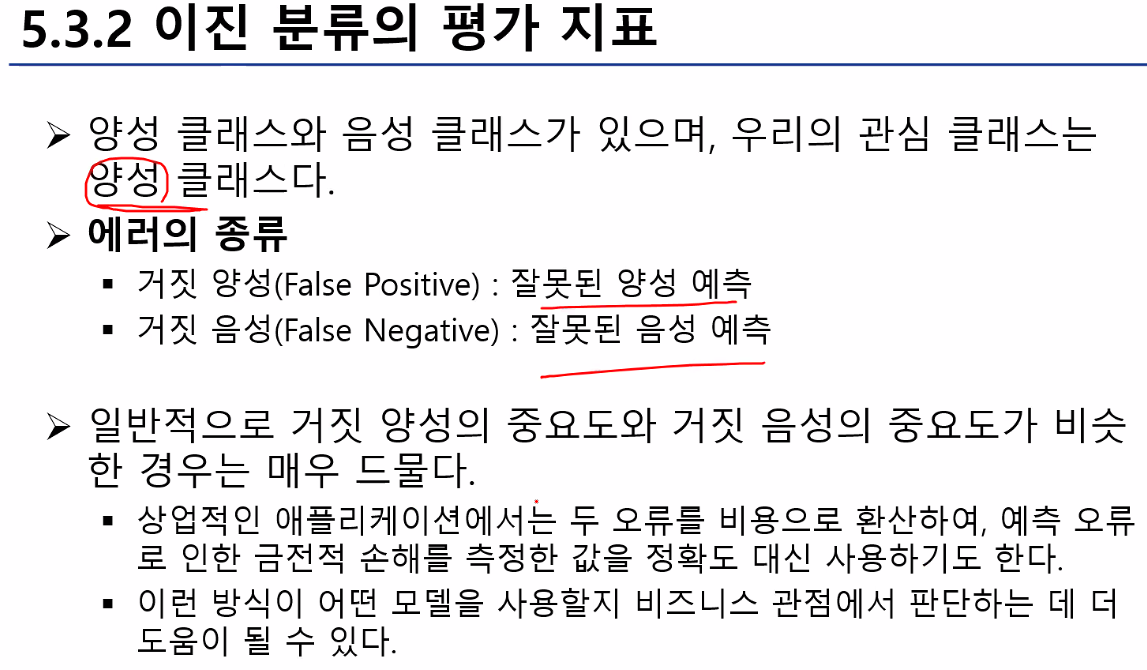

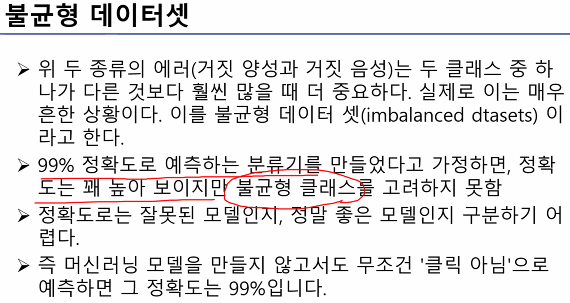

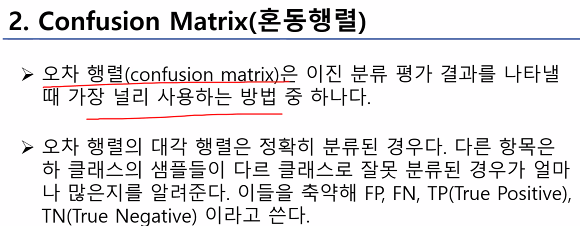

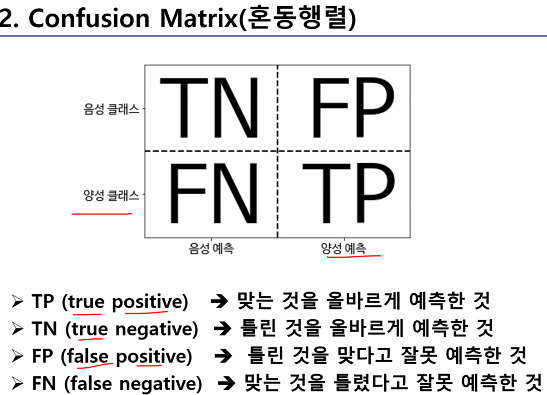

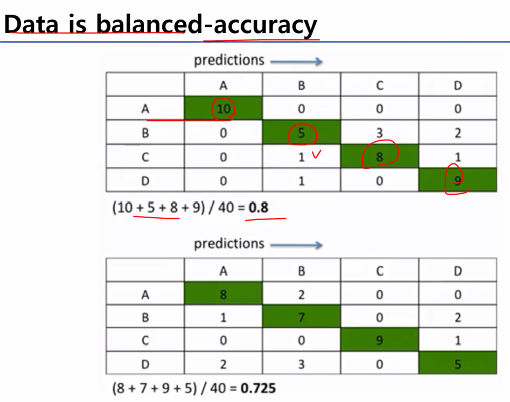

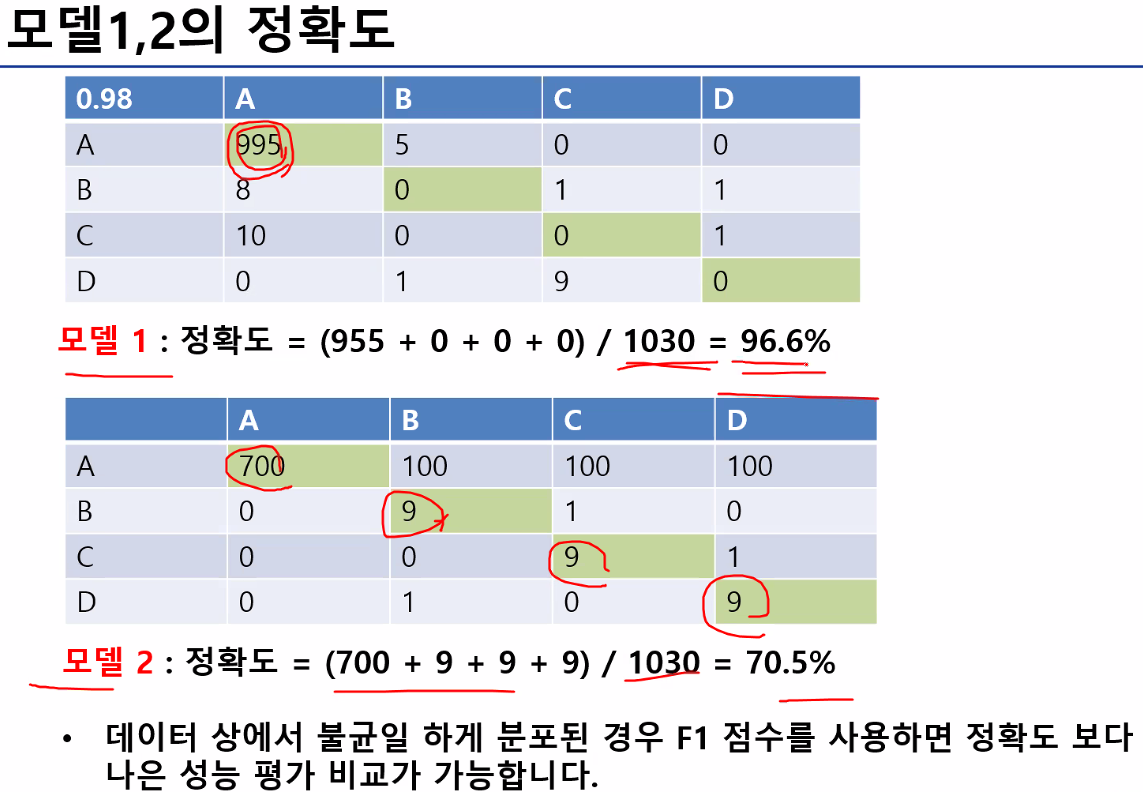

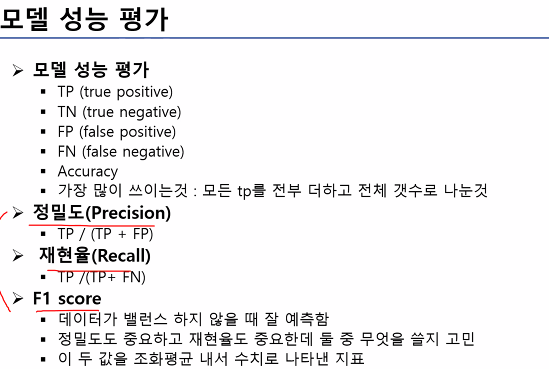

In [30]:
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f'logreg 점수 { logreg.score(X_test,y_test)}')
print('----')

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print(f"오차행렬:\n {confusion}")
print(f'confusion matrix의 정확도: {np.sum(np.diag(confusion)) / np.sum(confusion)}')


logreg 점수 0.9844444444444445
----
오차행렬:
 [[402   1]
 [  6  41]]
confusion matrix의 정확도: 0.9844444444444445


* confusion_matrix의 출력은 2x2 배열입니다. 
* 행은 정답 클래스에 해당하고, 열은 예측 클래스에 해당합니다.

* 각 항목의 숫자는 행에 해당하는 클래스(여기서는 '9 아님'과 '9')가 얼마나 많이 열에 해당하는 클래스로 분류되었는지를 나타냅니다.


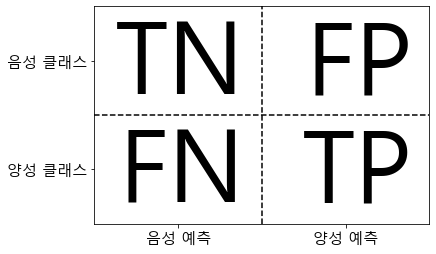

In [32]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

In [34]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\결정 트리 모델:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀 모델:")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[366  37]
 [ 44   3]]
\결정 트리 모델:
[[390  13]
 [ 24  23]]

로지스틱 회귀 모델:
[[402   1]
 [  6  41]]


* confusion_matrix를 보면 pred_most_frequent에서 잘못된 것이 보입니다.
* 항상 동일한 클래스를 예측하기 때문입니다.
* 반면에 pred_dummy는 특히 FN과 FP보다 TP가 매우 적고, TP보다 FP가 매우 많습니다.
* pred_logreg는 거의 모든 면에서pred_tree보다 낫습니다.
* 이 행렬의 모든 면을 살펴보면 많은 정보를 얻을 수 있지만, 매우 수동적이며 정성적인 방법입니다.


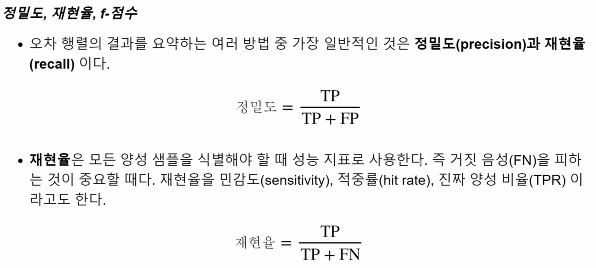

In [39]:
from sklearn.metrics import f1_score
print(f"빈도 기반 더미 모델의 f1 score: {f1_score(y_test,pred_most_frequent)}")
print(f"무작위 더미 모델의 f1 score: \t {f1_score(y_test,pred_dummy)}")
print(f"트리 모델의 f1 score: \t {f1_score(y_test,pred_tree)}")
print(f"로지스틱 회귀 모델의 f1 score: \t {f1_score(y_test,pred_logreg)}")

빈도 기반 더미 모델의 f1 score: 0.0
무작위 더미 모델의 f1 score: 	 0.0689655172413793
트리 모델의 f1 score: 	 0.5542168674698795
로지스틱 회귀 모델의 f1 score: 	 0.9213483146067415


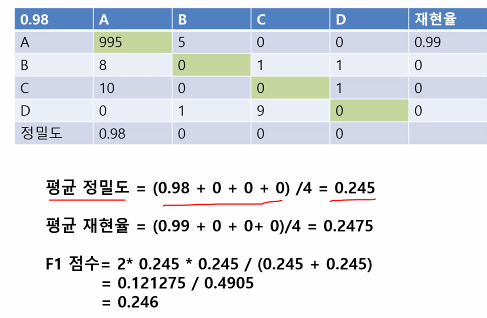

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



### ConfusionMatrixDisplay

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test
                                     ,display_labels=["9아님","9"])
plt.show()

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

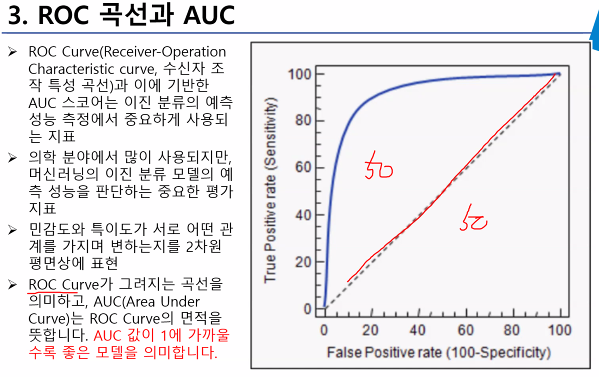

In [66]:
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC



NameError: name 'svc' is not defined

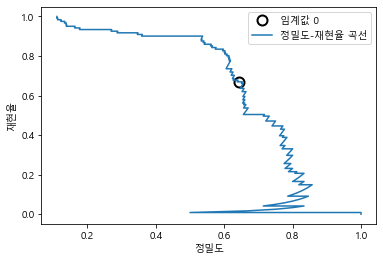

In [68]:
from sklearn.datasets import make_blobs
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")
plt.show() # 책에는 없음

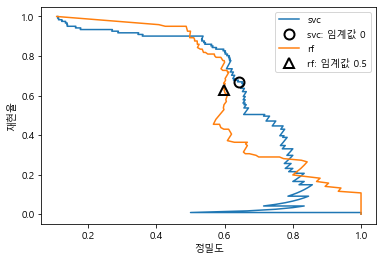

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="svc: 임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")
plt.show() # 책에는 없음

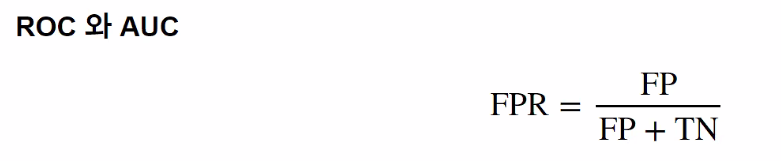

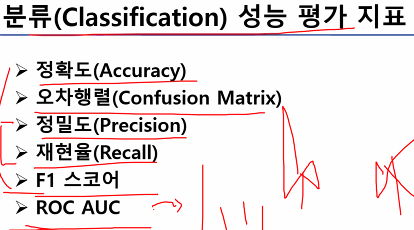

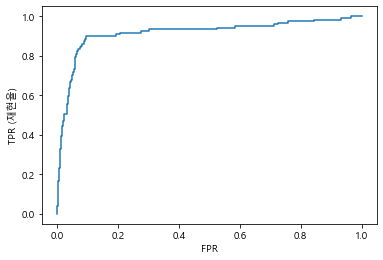

In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC 곡선')
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.show()